<a href="https://colab.research.google.com/github/ankit-genzeon/AI-ML-Bootcamp-Genzeon-2023/blob/master/Diabetes_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
Dataset = '/content/drive/MyDrive/Colab Notebooks/DataSet/diabetes2.csv'
df = pd.read_csv(Dataset)

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

LOGISTIC REGRESSION

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Read the dataset
dataset = '/content/drive/MyDrive/Colab Notebooks/DataSet/diabetes2.csv'
df = pd.read_csv(dataset)

# Handle missing values if any
df = df.apply(pd.to_numeric, errors='coerce')  # Convert string columns to numeric
df = df.dropna()

# # Split the data into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Score accuracy on Complete Data
X_scaled = scaler.transform(X)
print("Model Score accuracy on Complete Data:", model.score(X_scaled, y) * 100)

# Model Score accuracy on train data
print("Model Score accuracy on train data:", model.score(X_train, y_train) * 100)

# Model Score accuracy on test data
print("Model Score accuracy on test data:", model.score(X_test, y_test) * 100)

# Making a predictive system
input_data = np.array([[10, 98, 70, 21, 60, 49.5, 0.43, 41]])
input_data_reshape = scaler.transform(input_data)

prediction = model.predict(input_data_reshape)
print("Prediction:", prediction)


Model Score accuracy on Complete Data: 76.69270833333334
Model Score accuracy on train data: 77.0358306188925
Model Score accuracy on test data: 75.32467532467533
Prediction: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


KNN

In [9]:

from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [10]:
y_pred=knn_clf.predict(X_test)

In [11]:
knn_clf.score(scaler.transform(X),y)

0.9244791666666666

In [12]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#for best k values
neighbors=np.arange(1,27)#array and initialize it with 1,20
overall_accuracy=np.empty(len(neighbors))
training_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn_clf=KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train,y_train)

  training_accuracy[i]=knn_clf.score(X_train,y_train)

  test_accuracy[i]=knn_clf.score(X_test,y_test)
  error_rate= []
  error_rate.append(np.mean(y_pred != y_test))


  #overall accuracy
  overall_accuracy[i]=knn_clf.score(scaler.transform(X),y)



In [17]:
error_rate

[0.1,
 0.15,
 0.12,
 0.11,
 0.09,
 0.1,
 0.08,
 0.07,
 0.1,
 0.11,
 0.13,
 0.15,
 0.12,
 0.11,
 0.1,
 0.09,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.15,
 0.14,
 0.12,
 0.11]

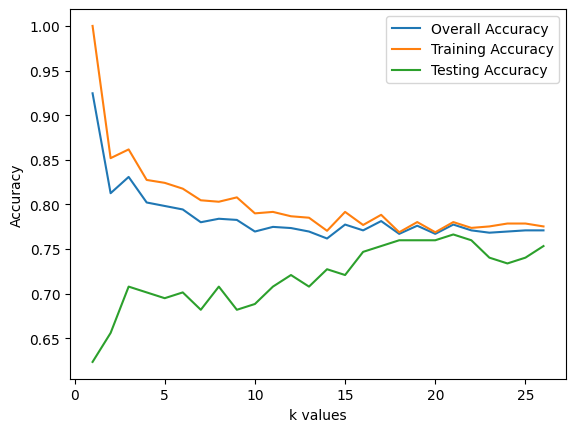

In [13]:
#Generate the graphs
import matplotlib.pyplot as plt
plt.plot(neighbors,overall_accuracy,label="Overall Accuracy")
plt.plot(neighbors,training_accuracy,label="Training Accuracy")
plt.plot(neighbors,test_accuracy,label="Testing Accuracy")
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Text(0, 0.5, 'Error rate')

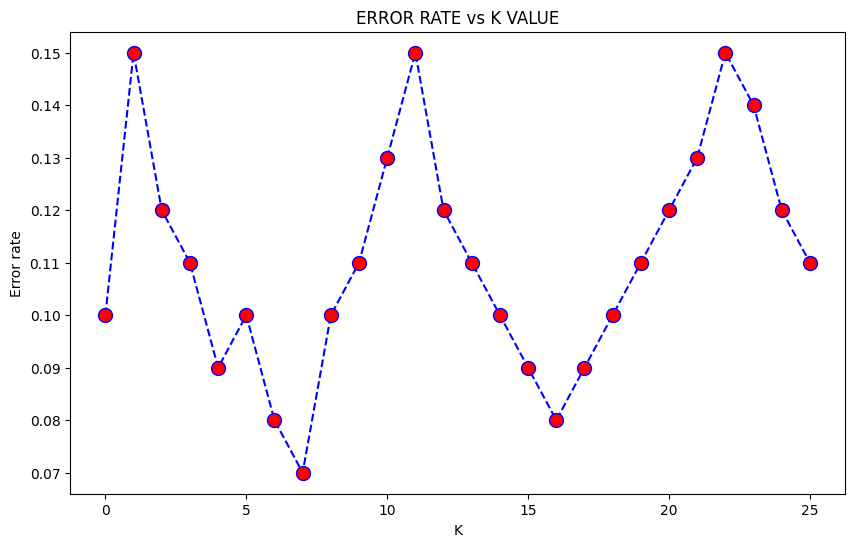

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(0,26), error_rate, color='blue',linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('ERROR RATE vs K VALUE')
plt.xlabel('K')
plt.ylabel('Error rate')

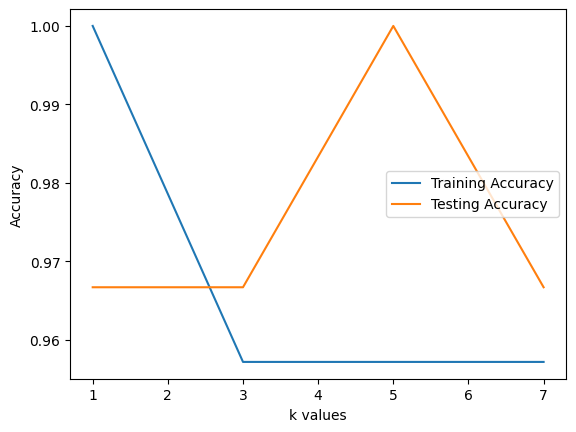

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class KNN:
    def __init__(self, k):
        self.k = k

    def calculate_distance(self, X1, X2):
        return np.sqrt(np.sum((X1 - X2) ** 2))

    def find_neighbors(self, X_train, X_test):
        distances = []
        for i in range(len(X_train)):
            dist = self.calculate_distance(X_test, X_train[i])
            distances.append((i, dist))
        distances.sort(key=lambda x: x[1])
        neighbors = [distances[i][0] for i in range(self.k)]
        return neighbors

    def vote_labels(self, y_train, neighbors):
        labels = [y_train[i] for i in neighbors]
        return max(set(labels), key=labels.count)

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for test_sample in X_test:
            neighbors = self.find_neighbors(self.X_train, test_sample)
            label = self.vote_labels(self.y_train, neighbors)
            y_pred.append(label)
        return np.array(y_pred)

# Generate random classification data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Specify k values for testing
neighbors = [1, 3, 5, 7]

# Initialize lists to store accuracy values
training_accuracy = []
test_accuracy = []

# Perform KNN for each k value
for k in neighbors:
    knn = KNN(k)
    knn.fit(X_train, y_train)

    # Predict labels for training and testing data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy
    training_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Generate the graphs
plt.plot(neighbors, training_accuracy, label="Training Accuracy")
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
